In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast 
from matplotlib import animation, rc
from IPython.display import HTML

In [67]:
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def excel_style(col):
    """ Convert given row and column number to an Excel-style cell name. """
    result = []
    while col:
        col, rem = divmod(col-1, 26)
        result[:0] = LETTERS[rem]
    return ''.join(result)

cols = []
for col_no in range(1, 100):
    cols.append(excel_style(col_no))
model = "barrier2_L1"
df = pd.read_csv("output/gridworld_continuous/{}/trajs.csv".format(model), names=cols)


training_steps = []
trajs = []
for ridx, row in df.iterrows():
    traj = []
    for cidx, col in enumerate(list(df)):
        elem = df.iloc[ridx, cidx]
        if cidx == 0:
            training_steps.append(elem)
        else:
            if pd.isna(elem):  # if we find Nan, just repeat last element
                traj.append(traj[-1])
            else:
                elem = np.array(elem[1:-1].split()).astype(float)
                traj.append(elem)
    trajs.append(np.stack(traj))

print(len(training_steps))

1718


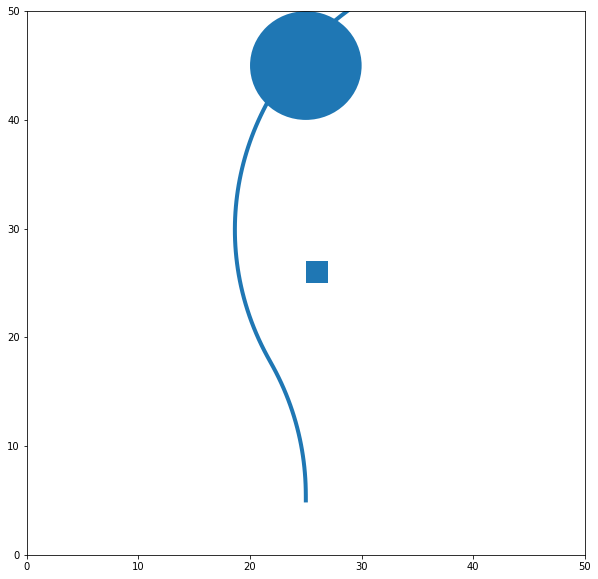

In [68]:
from matplotlib.pyplot import figure
from matplotlib.patches import Circle, Rectangle
from matplotlib.animation import FuncAnimation
rc('animation', html='html5')

width = 50
height = 50
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0,50)
ax.set_ylim(0,50)
ln, = ax.plot([],[], lw=4)
goal = Circle((width/2., height-5.), 5)
ax.add_artist(goal)
if not('barrier0' in model):
    barrier_size = int(model[7])
    barrier = Rectangle((width/2., height/2.), barrier_size,barrier_size)
    ax.add_artist(barrier)


def init():
    ln.set_data([],[])
    return ln,

def animate(i):
    ln.set_data(trajs[i][:,0], trajs[i][:,1])
    return ln,
    
anim = FuncAnimation(fig, animate, init_func=init,
                    frames=len(training_steps), interval=40, blit=True)
anim

In [69]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
anim.save('{}.mp4'.format(model), writer=writer)